# Lab 7: Convolutions and Convolutional neural networks

```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
In this lab, you will practice simple deep learning model in Pytorch.

Lab Plan
1. Convolutions - application examples
2. Building CNN in PyTorch
    - example CNN
    - comparing with Fully-connected NN

```

<hr>

## 1. Recap

1. What is the use of convolutions? (In general)
2. Why use convolutional layers instead of fully-connected ones?



## 2. Convolutions
Let's upload some image (you can try your own image changing the url)

In [1]:
import urllib.request
url = "https://www.dropbox.com/scl/fi/0n8y4jtqdt51xedwgpb5g/grid_img.jpg?rlkey=ud5912lz83u0z05dicfvq1w3z&st=stuhlkhe&dl=1"
filename = 'grid_img.jpg'
urllib.request.urlretrieve(url, filename)

('grid_img.jpg', <http.client.HTTPMessage at 0x12b093c28f0>)

## 2. Reading image data

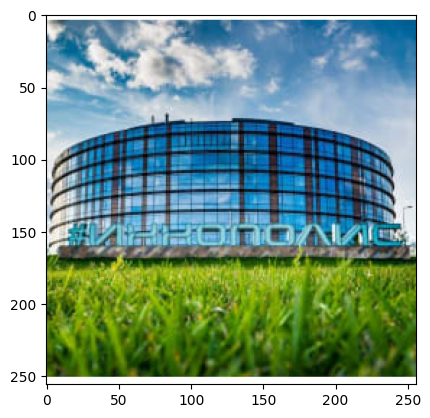

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

# Let's read and plot the image
image = plt.imread('grid_img.jpg')
plt.imshow(image)

## 2.1 Operations on Image Data

original img shape:  (256, 256, 3)
grayscale img shape (256, 256)


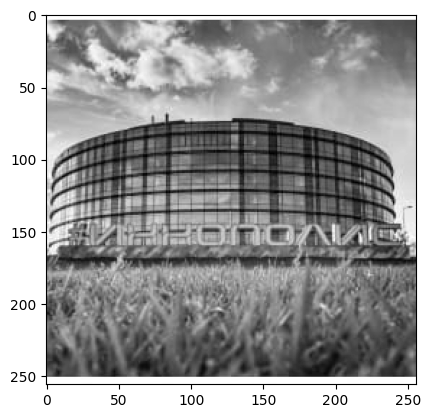

In [3]:
gray_image = rgb2gray(image)
plt.imshow(gray_image * 100, cmap='gray')
print("original img shape: ", image.shape)
print("grayscale img shape", gray_image.shape)

## 2.2 Convolutions for edge-detecting

In [4]:
# first, let's define edge-detecting filters
horizontal_kernel = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])
print(horizontal_kernel, 'is a kernel for detecting horizontal edges')

vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
print(vertical_kernel, 'is a kernel for detecting vertical edges')

# out_h = ndimage.convolve(gray_image, sobel_horizontal, mode='reflect')
# out_v = ndimage.convolve(gray_image, sobel_vertical, mode='reflect')

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] is a kernel for detecting vertical edges


Let's apply different types of convolutions on this image. Complete the following function.

Take care of dimensions - the resuting image should be of the same size.
Hint:

![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)

**TASK:** Define the convolution method

Horizontal kernel applied


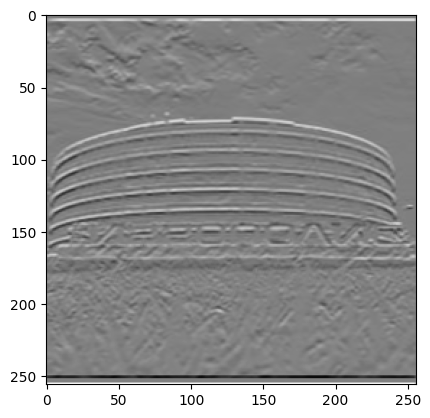

In [5]:
# Apply kernel on input image such that the image size is preserved
def convolve(img, kernel):
    height, width = img.shape
    filter_size = kernel.shape[0]

    # Ensure the kernel size is odd for symmetrical padding
    if (filter_size - 1) % 2 != 0:
        raise ValueError("Invalid kernel size. Kernel size must be odd for proper padding.")

    padding = (filter_size - 1) // 2

    # Use np.pad for consistent padding, with zero padding on edges
    padded_img = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Initialize the result array
    result = np.zeros(((height + 2 * padding - filter_size + 1), (width + 2 * padding - filter_size + 1)))

    # TODO : Perform convolution by sliding the kernel over the image
    for i in range(height):
        for j in range(width):
            result[i, j] = np.sum(padded_img[i:i + filter_size, j:j + filter_size] * kernel)

    return result

# Example usage
c = convolve(gray_image, horizontal_kernel)
print("Horizontal kernel applied")
plt.imshow(c, cmap='gray')
plt.show()

Vertical kernel applied


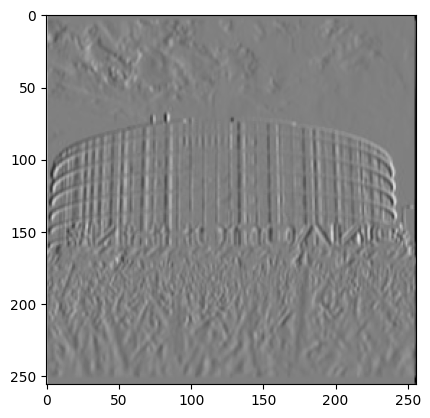

In [6]:
c = convolve(gray_image, vertical_kernel)
print("Vertical kernel applied")
plt.imshow(c, cmap='gray')

Your kernel applied


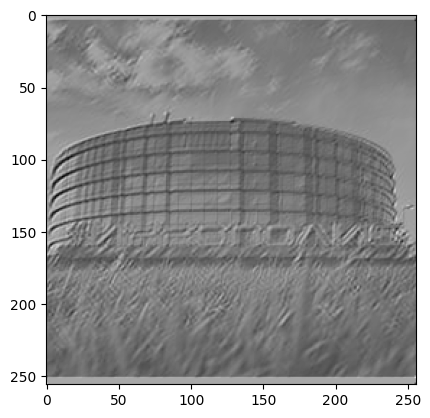

In [7]:
# play with numbers, see how changing the kernel affects the result
your_kernel = np.array([[-1, 0, 1],
                        [0, 1, 0],
                        [1, 0, -1]])

c = convolve(gray_image, your_kernel)
print("Your kernel applied")
plt.imshow(c, cmap='gray')

some_kernel = np.array([[-1]])

## 3. CNN with PyTorch

### 3.1. Data Loading

In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Random seed for reproducibility
torch.manual_seed(42)

# Device configuration: Use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Batch sizes
train_batch_size = 32
test_batch_size = 100

# Data transformations: Normalize with mean and std values for MNIST
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean and std
])

# Define dataset paths
data_path = os.path.join(".", "data")

# Load MNIST datasets with transformations
train_dataset = datasets.MNIST(root=data_path, train=True, download=True, transform=data_transforms)
test_dataset = datasets.MNIST(root=data_path, train=False, download=True, transform=data_transforms)

# Data loaders: Shuffle training data, no need to shuffle test data
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch_size, shuffle=False)

# Print device information
print(f"Using device: {device}")

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:11<00:00, 894798.78it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 132617.16it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1270187.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 9356841.24it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Using device: cuda


## 3.2 CNN model

**Task:**
- Define a CNN model with two convolutional layes, dropout layer and two fully connected layers (one hidden layer + output layer)
- Define the forward method in the CNN model where each convolutional layer is followed by a max pooling and each fully connected layer followed by dropout.
- Use Relu as activation function for the all hidden layers
- Use kernel size = 5 for the convolutional layes

In [9]:
class CNN(nn.Module):
    # Convolution formula: ((n + 2p - f) / s) + 1

    def __init__(self):
        super(CNN, self).__init__()

        # First convolutional layer: input channels = 1 (grayscale), output channels = 10, kernel size = 5
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)

        # Second convolutional layer: input channels = 10, output channels = 20, kernel size = 5
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)

        # Dropout layer for conv layers
        self.conv_drop = nn.Dropout2d()

        # Fully connected layers
        # The input size (320) is dynamically determined in the forward pass
        self.fc1 = nn.Linear(in_features=320, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=10)

        # Dropout for fully connected layers
        self.fc_drop = nn.Dropout(p=0.5)

    def forward(self, x):
        # Conv1 -> ReLU -> MaxPool
        x = torch.relu(torch.max_pool2d(self.conv1(x), kernel_size=2))
        # Calculate the shape after this layer:
        # Input: (28x28x1), Output: (24 x 24 x 10), Pooling: (12 x 12 x 10)

        # Conv2 -> ReLU -> MaxPool -> Dropout
        x = torch.relu(torch.max_pool2d(self.conv_drop(self.conv2(x)), kernel_size=2))
        # Input: (12 x 12 x 10), Output: (8 x 8 x 20), Pooling: (4 x 4 x 20)

        # Flattening the output to feed into fully connected layers
        x = x.view(x.size(0), -1)  # Automatically computes the correct flattening size
        # Flattened size: 320 (height * width * channels)

        # FC1 -> ReLU -> Dropout
        x = torch.relu(self.fc1(x))
        x = self.fc_drop(x)

        # FC2 -> LogSoftmax for final output
        x = self.fc2(x)
        return torch.nn.functional.log_softmax(x, dim=1)

# Device configuration: Automatically set to CUDA if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model initialization and sending to the device
model_cnn = CNN().to(device)

## 2.2 Fully-conected model from the last class

 TASK: reducing number of params to match that of CNN

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Reduce the number of neurons to match the parameter count of a typical CNN
        self.fc1 = nn.Linear(28*28, 256)  # Input layer: 28*28 pixels, reduced to 256
        self.fc2 = nn.Linear(256, 128)    # Hidden layer 1: 256 -> 128
        self.fc3 = nn.Linear(128, 64)     # Hidden layer 2: 128 -> 64
        self.fc4 = nn.Linear(64, 10)      # Output layer: 64 -> 10 (for 10 classes)

        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(p=0.5)

        # Initialize weights using a uniform distribution for better convergence
        self._init_weights()

    def _init_weights(self):
        """Custom weight initialization to improve training stability"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.01)

    def forward(self, x):
        # Flatten the input tensor (batch_size, 28*28)
        x = x.view(-1, 28*28)

        # Forward pass through the fully connected layers with ReLU activations
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after each hidden layer

        x = torch.relu(self.fc2(x))
        x = self.dropout(x)

        x = torch.relu(self.fc3(x))
        x = self.dropout(x)

        # Output layer (log_softmax for classification)
        x = self.fc4(x)
        return nn.functional.log_softmax(x, dim=1)

# Device configuration: Use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model instantiation and sending to the device
model_nn = Net().to(device)


In [28]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()

        # Reduce the number of neurons to match the parameter count of a typical CNN
        self.fc1 = nn.Linear(28*28, 32)  # Input layer: 28*28 pixels, reduced to 256
        # self.fc2 = nn.Linear(64, 32)    # Hidden layer 1: 256 -> 128
        # self.fc3 = nn.Linear(64, 32)     # Hidden layer 2: 128 -> 64
        self.fc4 = nn.Linear(32, 10)      # Output layer: 64 -> 10 (for 10 classes)

        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(p=0.5)

        # Initialize weights using a uniform distribution for better convergence
        self._init_weights()

    def _init_weights(self):
        """Custom weight initialization to improve training stability"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.01)

    def forward(self, x):
        # Flatten the input tensor (batch_size, 28*28)
        x = x.view(-1, 28*28)

        # Forward pass through the fully connected layers with ReLU activations
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after each hidden layer

        # x = torch.relu(self.fc2(x))
        # x = self.dropout(x)

        # x = torch.relu(self.fc3(x))
        # x = self.dropout(x)

        # Output layer (log_softmax for classification)
        x = self.fc4(x)
        return nn.functional.log_softmax(x, dim=1)

# Device configuration: Use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model instantiation and sending to the device
small_model_nn = SmallNet().to(device)


### Counting number of model trainable parameters

In [29]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [30]:
# Let's compare the number of parameters of these models:
print("Number of params in the Fully-connected model:", count_parameters(model_nn))
print("Number of params in the Smaller Fully-connected model:", count_parameters(small_model_nn))
print("Number of params in the CNN model:", count_parameters(model_cnn))

Number of params in the Fully-connected model: 242762
Number of params in the Smaller Fully-connected model: 25450
Number of params in the CNN model: 21840


Task: Try changing the fully-connected model to have the same number of parameters as CNN and compare the resulting performance

## 3. Training and testing

In [31]:
from tqdm import tqdm  # For progress bar
from sklearn.metrics import f1_score

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    total_loss = 0
    correct = 0
    num_batches = len(train_loader)

    # tqdm progress bar for better tracking of batch progress
    for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch}")):
        data, target = data.to(device), target.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = nn.functional.nll_loss(output, target)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Accumulate loss for average calculation
        total_loss += loss.item()

        # Calculate accuracy
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    avg_loss = total_loss / num_batches
    accuracy = 100. * correct / len(train_loader.dataset)
    print(f'==> Epoch {epoch} Completed: Average Loss: {avg_loss:.6f}\tAccuracy: {accuracy:.2f}%')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []  # Store all predictions
    all_targets = []  # Store all true labels
    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing"):
            data, target = data.to(device), target.to(device)

            # Forward pass (no backprop during evaluation)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss

            # Prediction and accuracy
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

            all_preds.extend(pred.cpu().numpy())  # Convert predictions to numpy
            all_targets.extend(target.cpu().numpy())  # Convert targets to numpy


    # Calculate test f1, accuracy and loss over all batches
    test_loss /= len(test_loader.dataset)

    f1 = f1_score(all_targets, all_preds, average='weighted')
    accuracy = 100. * correct / len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%), F1-Score {:.2f}\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset), f1))


    # print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')

    # Return test loss and accuracy for tracking
    return test_loss, accuracy


## Training the CNN model

In [32]:
from torch.optim.lr_scheduler import StepLR  # Scheduler for learning rate

# Hyperparameters
epochs = 10
lr = 0.01
momentum = 0.5
patience = 3  # Early stopping patience (Optional)

# Model and optimizer
model = model_cnn.to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

# Optional: Learning rate scheduler (reduces the learning rate by a factor of 0.1 every 5 epochs)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop
best_accuracy = 0
early_stop_counter = 0

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")

    # Training phase
    train(model, device, train_loader, optimizer, epoch)

    # Testing phase and result unpacking
    test_loss, test_accuracy = test(model, device, test_loader)

    # Save best model based on test accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_mnist_cnn.pt")
        print(f"Best model saved with accuracy: {best_accuracy:.2f}%")
        early_stop_counter = 0  # Reset early stop counter if model improves
    else:
        early_stop_counter += 1

    # Early stopping (Optional)
    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch} due to no improvement in test accuracy.")
        break

    # Step the scheduler (if using a learning rate scheduler)
    scheduler.step()

# Final model save (optional)
torch.save(model.state_dict(), "final_mnist_cnn.pt")
print("Training complete. Model saved as 'final_mnist_cnn.pt'.")



Epoch 1/10


Training Epoch 1: 100%|██████████| 1875/1875 [00:22<00:00, 85.10it/s]


==> Epoch 1 Completed: Average Loss: 0.743339	Accuracy: 75.37%


Testing: 100%|██████████| 100/100 [00:03<00:00, 32.41it/s]


Test set: Average loss: 0.1457, Accuracy: 9573/10000 (95.73%), F1-Score 0.96

Best model saved with accuracy: 95.73%

Epoch 2/10


Training Epoch 2: 100%|██████████| 1875/1875 [00:30<00:00, 60.79it/s]


==> Epoch 2 Completed: Average Loss: 0.322241	Accuracy: 90.18%


Testing: 100%|██████████| 100/100 [00:02<00:00, 36.85it/s]


Test set: Average loss: 0.0972, Accuracy: 9685/10000 (96.85%), F1-Score 0.97

Best model saved with accuracy: 96.85%

Epoch 3/10


Training Epoch 3: 100%|██████████| 1875/1875 [00:17<00:00, 106.52it/s]


==> Epoch 3 Completed: Average Loss: 0.259437	Accuracy: 92.19%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.16it/s]


Test set: Average loss: 0.0741, Accuracy: 9773/10000 (97.73%), F1-Score 0.98

Best model saved with accuracy: 97.73%

Epoch 4/10


Training Epoch 4: 100%|██████████| 1875/1875 [00:20<00:00, 90.59it/s]


==> Epoch 4 Completed: Average Loss: 0.229924	Accuracy: 93.19%


Testing: 100%|██████████| 100/100 [00:03<00:00, 25.53it/s]


Test set: Average loss: 0.0632, Accuracy: 9801/10000 (98.01%), F1-Score 0.98

Best model saved with accuracy: 98.01%

Epoch 5/10


Training Epoch 5: 100%|██████████| 1875/1875 [00:21<00:00, 87.01it/s]


==> Epoch 5 Completed: Average Loss: 0.208725	Accuracy: 93.92%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.52it/s]


Test set: Average loss: 0.0606, Accuracy: 9808/10000 (98.08%), F1-Score 0.98

Best model saved with accuracy: 98.08%

Epoch 6/10


Training Epoch 6: 100%|██████████| 1875/1875 [00:17<00:00, 105.78it/s]


==> Epoch 6 Completed: Average Loss: 0.181503	Accuracy: 94.68%


Testing: 100%|██████████| 100/100 [00:03<00:00, 25.03it/s]


Test set: Average loss: 0.0557, Accuracy: 9826/10000 (98.26%), F1-Score 0.98

Best model saved with accuracy: 98.26%

Epoch 7/10


Training Epoch 7: 100%|██████████| 1875/1875 [00:21<00:00, 85.32it/s] 


==> Epoch 7 Completed: Average Loss: 0.172107	Accuracy: 94.88%


Testing: 100%|██████████| 100/100 [00:03<00:00, 31.72it/s]


Test set: Average loss: 0.0543, Accuracy: 9832/10000 (98.32%), F1-Score 0.98

Best model saved with accuracy: 98.32%

Epoch 8/10


Training Epoch 8: 100%|██████████| 1875/1875 [00:30<00:00, 62.38it/s] 


==> Epoch 8 Completed: Average Loss: 0.168341	Accuracy: 95.13%


Testing: 100%|██████████| 100/100 [00:02<00:00, 45.13it/s]


Test set: Average loss: 0.0541, Accuracy: 9834/10000 (98.34%), F1-Score 0.98

Best model saved with accuracy: 98.34%

Epoch 9/10


Training Epoch 9: 100%|██████████| 1875/1875 [00:20<00:00, 90.36it/s]


==> Epoch 9 Completed: Average Loss: 0.165300	Accuracy: 95.17%


Testing: 100%|██████████| 100/100 [00:04<00:00, 23.41it/s]


Test set: Average loss: 0.0531, Accuracy: 9839/10000 (98.39%), F1-Score 0.98

Best model saved with accuracy: 98.39%

Epoch 10/10


Training Epoch 10: 100%|██████████| 1875/1875 [00:22<00:00, 84.38it/s]


==> Epoch 10 Completed: Average Loss: 0.162506	Accuracy: 95.28%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.18it/s]


Test set: Average loss: 0.0522, Accuracy: 9840/10000 (98.40%), F1-Score 0.98

Best model saved with accuracy: 98.40%
Training complete. Model saved as 'final_mnist_cnn.pt'.


## Train the fully-connected model

In [34]:
# Model and optimizer setup
model = model_nn.to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

# Optional: Learning rate scheduler (reduces LR every 5 epochs)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Initialize parameters
best_accuracy = 0.0
early_stop_counter = 0
patience = 3  # Early stopping patience

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")

    # Training phase
    train(model, device, train_loader, optimizer, epoch)

    # Testing phase and result unpacking
    test_loss, test_accuracy = test(model, device, test_loader)

    # Save the best model based on test accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_mnist_nn.pt")
        print(f"Best model saved with accuracy: {best_accuracy:.2f}%")
        early_stop_counter = 0  # Reset the early stopping counter
    else:
        early_stop_counter += 1

    # Early stopping mechanism
    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch} due to no improvement in test accuracy.")
        break

    # Step the scheduler (if using one)
    scheduler.step()

# Save the final model (optional)
torch.save(model.state_dict(), "final_mnist_nn.pt")
print("Training complete. Final model saved as 'final_mnist_nn.pt'.")



Epoch 1/10


Training Epoch 1: 100%|██████████| 1875/1875 [00:19<00:00, 95.86it/s] 


==> Epoch 1 Completed: Average Loss: 0.323378	Accuracy: 91.44%


Testing: 100%|██████████| 100/100 [00:02<00:00, 37.90it/s]


Test set: Average loss: 0.1604, Accuracy: 9566/10000 (95.66%), F1-Score 0.96

Best model saved with accuracy: 95.66%

Epoch 2/10


Training Epoch 2: 100%|██████████| 1875/1875 [00:17<00:00, 108.88it/s]


==> Epoch 2 Completed: Average Loss: 0.288901	Accuracy: 92.39%


Testing: 100%|██████████| 100/100 [00:02<00:00, 48.22it/s]


Test set: Average loss: 0.1408, Accuracy: 9610/10000 (96.10%), F1-Score 0.96

Best model saved with accuracy: 96.10%

Epoch 3/10


Training Epoch 3: 100%|██████████| 1875/1875 [00:16<00:00, 110.96it/s]


==> Epoch 3 Completed: Average Loss: 0.266796	Accuracy: 92.99%


Testing: 100%|██████████| 100/100 [00:03<00:00, 33.03it/s]


Test set: Average loss: 0.1326, Accuracy: 9630/10000 (96.30%), F1-Score 0.96

Best model saved with accuracy: 96.30%

Epoch 4/10


Training Epoch 4: 100%|██████████| 1875/1875 [00:16<00:00, 111.45it/s]


==> Epoch 4 Completed: Average Loss: 0.248472	Accuracy: 93.45%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.53it/s]


Test set: Average loss: 0.1252, Accuracy: 9646/10000 (96.46%), F1-Score 0.96

Best model saved with accuracy: 96.46%

Epoch 5/10


Training Epoch 5: 100%|██████████| 1875/1875 [00:18<00:00, 98.77it/s]


==> Epoch 5 Completed: Average Loss: 0.232265	Accuracy: 94.04%


Testing: 100%|██████████| 100/100 [00:02<00:00, 45.85it/s]


Test set: Average loss: 0.1223, Accuracy: 9671/10000 (96.71%), F1-Score 0.97

Best model saved with accuracy: 96.71%

Epoch 6/10


Training Epoch 6: 100%|██████████| 1875/1875 [00:16<00:00, 111.04it/s]


==> Epoch 6 Completed: Average Loss: 0.209656	Accuracy: 94.70%


Testing: 100%|██████████| 100/100 [00:02<00:00, 48.40it/s]


Test set: Average loss: 0.1165, Accuracy: 9679/10000 (96.79%), F1-Score 0.97

Best model saved with accuracy: 96.79%

Epoch 7/10


Training Epoch 7: 100%|██████████| 1875/1875 [00:17<00:00, 105.68it/s]


==> Epoch 7 Completed: Average Loss: 0.199518	Accuracy: 94.89%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.11it/s]


Test set: Average loss: 0.1155, Accuracy: 9696/10000 (96.96%), F1-Score 0.97

Best model saved with accuracy: 96.96%

Epoch 8/10


Training Epoch 8: 100%|██████████| 1875/1875 [00:17<00:00, 108.87it/s]


==> Epoch 8 Completed: Average Loss: 0.197427	Accuracy: 95.03%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.58it/s]


Test set: Average loss: 0.1148, Accuracy: 9699/10000 (96.99%), F1-Score 0.97

Best model saved with accuracy: 96.99%

Epoch 9/10


Training Epoch 9: 100%|██████████| 1875/1875 [00:18<00:00, 103.99it/s]


==> Epoch 9 Completed: Average Loss: 0.193638	Accuracy: 95.03%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.33it/s]


Test set: Average loss: 0.1131, Accuracy: 9698/10000 (96.98%), F1-Score 0.97


Epoch 10/10


Training Epoch 10: 100%|██████████| 1875/1875 [00:17<00:00, 106.43it/s]


==> Epoch 10 Completed: Average Loss: 0.188637	Accuracy: 95.14%


Testing: 100%|██████████| 100/100 [00:02<00:00, 39.11it/s]

Test set: Average loss: 0.1137, Accuracy: 9703/10000 (97.03%), F1-Score 0.97

Best model saved with accuracy: 97.03%
Training complete. Final model saved as 'final_mnist_nn.pt'.


## Train the smaller Fully-connected network:

In [35]:
# Model and optimizer setup
model = small_model_nn.to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

# Optional: Learning rate scheduler (reduces LR every 5 epochs)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Initialize parameters
best_accuracy = 0.0
early_stop_counter = 0
patience = 3  # Early stopping patience

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")

    # Training phase
    train(model, device, train_loader, optimizer, epoch)

    # Testing phase and result unpacking
    test_loss, test_accuracy = test(model, device, test_loader)

    # Save the best model based on test accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_mnist_small_nn.pt")
        print(f"Best model saved with accuracy: {best_accuracy:.2f}%")
        early_stop_counter = 0  # Reset the early stopping counter
    else:
        early_stop_counter += 1

    # Early stopping mechanism
    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch} due to no improvement in test accuracy.")
        break

    # Step the scheduler (if using one)
    scheduler.step()

# Save the final model (optional)
torch.save(model.state_dict(), "final_mnist_small_nn.pt")
print("Training complete. Final model saved as 'final_mnist_small_nn.pt'.")



Epoch 1/10


Training Epoch 1: 100%|██████████| 1875/1875 [00:16<00:00, 111.75it/s]


==> Epoch 1 Completed: Average Loss: 0.746220	Accuracy: 75.96%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.67it/s]


Test set: Average loss: 0.2913, Accuracy: 9190/10000 (91.90%), F1-Score 0.92

Best model saved with accuracy: 91.90%

Epoch 2/10


Training Epoch 2: 100%|██████████| 1875/1875 [00:16<00:00, 117.05it/s]


==> Epoch 2 Completed: Average Loss: 0.544348	Accuracy: 82.62%


Testing: 100%|██████████| 100/100 [00:02<00:00, 44.33it/s]


Test set: Average loss: 0.2516, Accuracy: 9294/10000 (92.94%), F1-Score 0.93

Best model saved with accuracy: 92.94%

Epoch 3/10


Training Epoch 3: 100%|██████████| 1875/1875 [00:16<00:00, 112.23it/s]


==> Epoch 3 Completed: Average Loss: 0.499764	Accuracy: 84.10%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.91it/s]


Test set: Average loss: 0.2377, Accuracy: 9358/10000 (93.58%), F1-Score 0.94

Best model saved with accuracy: 93.58%

Epoch 4/10


Training Epoch 4: 100%|██████████| 1875/1875 [00:16<00:00, 115.78it/s]


==> Epoch 4 Completed: Average Loss: 0.473559	Accuracy: 84.95%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.99it/s]


Test set: Average loss: 0.2210, Accuracy: 9387/10000 (93.87%), F1-Score 0.94

Best model saved with accuracy: 93.87%

Epoch 5/10


Training Epoch 5: 100%|██████████| 1875/1875 [00:16<00:00, 112.03it/s]


==> Epoch 5 Completed: Average Loss: 0.454987	Accuracy: 85.44%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.06it/s]


Test set: Average loss: 0.2094, Accuracy: 9391/10000 (93.91%), F1-Score 0.94

Best model saved with accuracy: 93.91%

Epoch 6/10


Training Epoch 6: 100%|██████████| 1875/1875 [00:16<00:00, 116.94it/s]


==> Epoch 6 Completed: Average Loss: 0.432810	Accuracy: 86.40%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.35it/s]


Test set: Average loss: 0.2065, Accuracy: 9415/10000 (94.15%), F1-Score 0.94

Best model saved with accuracy: 94.15%

Epoch 7/10


Training Epoch 7: 100%|██████████| 1875/1875 [00:17<00:00, 109.89it/s]


==> Epoch 7 Completed: Average Loss: 0.423791	Accuracy: 86.78%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.93it/s]


Test set: Average loss: 0.2050, Accuracy: 9415/10000 (94.15%), F1-Score 0.94


Epoch 8/10


Training Epoch 8: 100%|██████████| 1875/1875 [00:16<00:00, 116.32it/s]


==> Epoch 8 Completed: Average Loss: 0.419432	Accuracy: 86.86%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.92it/s]


Test set: Average loss: 0.2037, Accuracy: 9425/10000 (94.25%), F1-Score 0.94

Best model saved with accuracy: 94.25%

Epoch 9/10


Training Epoch 9: 100%|██████████| 1875/1875 [00:16<00:00, 111.21it/s]


==> Epoch 9 Completed: Average Loss: 0.423416	Accuracy: 86.62%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.29it/s]


Test set: Average loss: 0.2027, Accuracy: 9422/10000 (94.22%), F1-Score 0.94


Epoch 10/10


Training Epoch 10: 100%|██████████| 1875/1875 [00:16<00:00, 115.76it/s]


==> Epoch 10 Completed: Average Loss: 0.416649	Accuracy: 86.94%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.26it/s]

Test set: Average loss: 0.2013, Accuracy: 9435/10000 (94.35%), F1-Score 0.94

Best model saved with accuracy: 94.35%
Training complete. Final model saved as 'final_mnist_small_nn.pt'.


## Self-Practice Task: Train a CNN on the Caltech 256 Dataset

**Objective**:
Build, train, and evaluate a CNN model to classify images in the Caltech 256 dataset. You'll:

1. Load and split the dataset into train, validation, and test sets.
2. Define and train a CNN architecture of your choice, and log the performance.
3. Use a pretrained model (e.g., VGG16) for the same task and compare it with your custom CNN based on accuracy and number of parameters.

### Use a Pretrained Model (VGG16)

In [1]:
from torchvision import models

# Load a pretrained VGG16 model
pretrained_vgg16 = models.vgg16(weights='DEFAULT')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\bouab/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [02:21<00:00, 3.91MB/s] 


In [4]:
import torch
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_transform  = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x : x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Normalize([0.48, 0.45, 0.4], [0.229, 0.224, 0.445]) #From image normalization
])

full_data = datasets.Caltech256('./data', download=True, transform=data_transform)

Downloading...
From (original): https://drive.google.com/uc?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK
From (redirected): https://drive.usercontent.google.com/download?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK&confirm=t&uuid=fe43e43a-f9d1-4681-b817-5345a039022b
To: c:\Users\bouab\DEV\Towards_Data_Science\Machine_Learning\__uni\data\caltech256\256_ObjectCategories.tar
100%|██████████| 1.18G/1.18G [05:08<00:00, 3.84MB/s]


Extracting ./data\caltech256\256_ObjectCategories.tar to ./data\caltech256


## Split the data

In [5]:
from torch.utils.data import random_split, DataLoader

train_size = int(0.8 * len(full_data))
val_size = int(0.1 * len(full_data))
test_size = len(full_data) - train_size - val_size

train_data, val_data, test_data = random_split(full_data, [train_size, val_size, test_size])

batch_size = 128

train_loader = DataLoader(train_data, batch_size, True)
val_loader = DataLoader(val_data, batch_size, False)
test_loader = DataLoader(test_data, batch_size, False)

## Defining a CNN

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
	def __init__(self, number_classes=257):
		super(SimpleCNN, self).__init__()
		self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
		self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
		self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

		self.fc1 = nn.Linear(256 * 28 * 28 , 512)
		self.output = nn.Linear(512, number_classes)
		self.dropout = nn.Dropout(0.5)
		self.flatten = nn.Flatten()

	def forward(self, x):
		x = F.relu(F.max_pool2d(self.conv1(x), 2))
		x = F.relu(F.max_pool2d(self.conv2(x), 2))
		x = F.relu(F.max_pool2d(self.conv3(x), 2))
		x = self.flatten.forward(x)
		x = F.relu(self.fc1(x))
		x = self.dropout(x)
		return self.output(x)

## Training the CNN

In [7]:
from tqdm import tqdm  # For progress bar
from sklearn.metrics import f1_score

def train(model, device, train_loader, optimizer, epoch, criterion=nn.functional.nll_loss):
	model.train()
	total_loss = 0
	correct = 0
	num_batches = len(train_loader)

	# tqdm progress bar for better tracking of batch progress
	for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch}")):
		data, target = data.to(device), target.to(device)

		optimizer.zero_grad()

		output = model(data)

		loss = criterion(output, target)

		loss.backward()

		optimizer.step()

		# Accumulate loss for average calculation
		total_loss += loss.item()

		correct += torch.sum((torch.argmax(output) == target).to(torch.float32)).item()

	# Calculate accuracy
	pred = output.argmax(dim=1, keepdim=True)
	correct += pred.eq(target.view_as(pred)).sum().item()

	avg_loss = total_loss / num_batches
	accuracy = 100. * correct / len(train_loader.dataset)
	print(f'==> Epoch {epoch} Completed: Average Loss: {avg_loss:.6f}\tAccuracy: {accuracy:.2f}%')


def test(model, device, test_loader, criterion=nn.functional.nll_loss):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []  # Store all predictions
    all_targets = []  # Store all true labels
    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing"):
            data, target = data.to(device), target.to(device)

            # Forward pass (no backprop during evaluation)
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss

            # Prediction and accuracy
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

            all_preds.extend(pred.cpu().numpy())  # Convert predictions to numpy
            all_targets.extend(target.cpu().numpy())  # Convert targets to numpy


    # Calculate test f1, accuracy and loss over all batches
    test_loss /= len(test_loader.dataset)

    accuracy = 100. * correct / len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%), F1-Score {:.2f}\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


    # print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')

    # Return test loss and accuracy for tracking
    return test_loss, accuracy

In [8]:
import torch

model = SimpleCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
	train(model, device=device, train_loader=train_loader, criterion=criterion, optimizer=optimizer, epoch=epoch)
	test(model, device=device, test_loader=test_loader, criterion=criterion)

Training Epoch 0:   1%|          | 1/192 [00:15<50:41, 15.92s/it]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.53 GiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 4.35 GiB is allocated by PyTorch, and 1.87 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

## Training VGG-16

In [42]:
optimizer = torch.optim.Adam(vgg16.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
  train(vgg16, device=device, train_loader=train_loader, criterion=criterion, optimizer=optimizer, epoch=epoch)
  test(vgg16, device=device, test_loader=test_loader, criterion=criterion)

Training Epoch 0: 100%|██████████| 192/192 [03:44<00:00,  1.17s/it]


==> Epoch 0 Completed: Average Loss: 13.471257	Accuracy: 7.03%


Testing: 100%|██████████| 24/24 [00:27<00:00,  1.13s/it]


Test set: Average loss: 0.0414, Accuracy: 193/3062 (6.30%), F1-Score 0.06



Training Epoch 1: 100%|██████████| 192/192 [03:44<00:00,  1.17s/it]


==> Epoch 1 Completed: Average Loss: 5.704311	Accuracy: 6.33%


Testing: 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]


Test set: Average loss: 0.0411, Accuracy: 232/3062 (7.58%), F1-Score 0.06



Training Epoch 2: 100%|██████████| 192/192 [03:45<00:00,  1.18s/it]


==> Epoch 2 Completed: Average Loss: 5.637511	Accuracy: 7.44%


Testing: 100%|██████████| 24/24 [00:26<00:00,  1.11s/it]


Test set: Average loss: 0.0409, Accuracy: 239/3062 (7.81%), F1-Score 0.06



Training Epoch 3: 100%|██████████| 192/192 [03:44<00:00,  1.17s/it]


==> Epoch 3 Completed: Average Loss: 5.787250	Accuracy: 7.15%


Testing: 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]


Test set: Average loss: 0.0411, Accuracy: 255/3062 (8.33%), F1-Score 0.06



Training Epoch 4: 100%|██████████| 192/192 [03:43<00:00,  1.17s/it]


==> Epoch 4 Completed: Average Loss: 5.421905	Accuracy: 7.35%


Testing: 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]

Test set: Average loss: 0.0406, Accuracy: 262/3062 (8.56%), F1-Score 0.06

